# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [3]:
import matplotlib.pyplot as plt
import cv2 # нужно поставить себе cv2 через conda install opencv

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

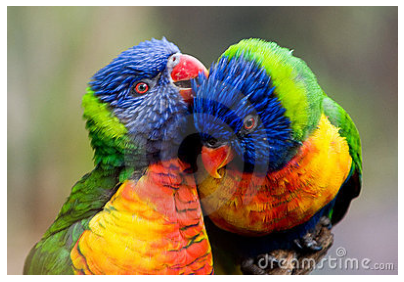

In [4]:
img = cv2.imread('birds.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [5]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей

(275, 400, 3)


In [6]:
data = img.reshape(275*400, 3)

In [7]:
from sklearn.cluster import KMeans
from skimage.metrics import structural_similarity as ssim
import numpy as np

In [8]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [9]:
def convert_to_image(y_pred, new_image):
    for i in np.unique(y_pred):
        new_image[np.where(y_pred == i)[0], 0] = np.average(data[np.where(y_pred == i)[0], 0])
        new_image[np.where(y_pred == i)[0], 1] = np.average(data[np.where(y_pred == i)[0], 1])
        new_image[np.where(y_pred == i)[0], 2] = np.average(data[np.where(y_pred == i)[0], 2])
    return new_image.reshape(275, 400, 3)

### KMeans

 n_clusters: 2, SSIM: 0.5333943885059159


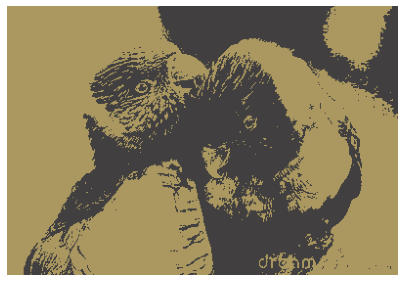

 n_clusters: 3, SSIM: 0.5632460511415358


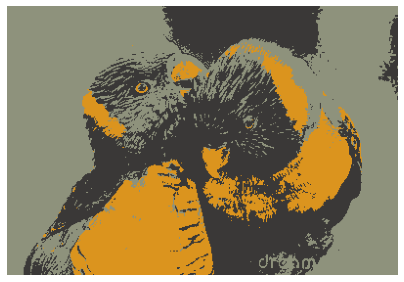

 n_clusters: 10, SSIM: 0.677489246243776


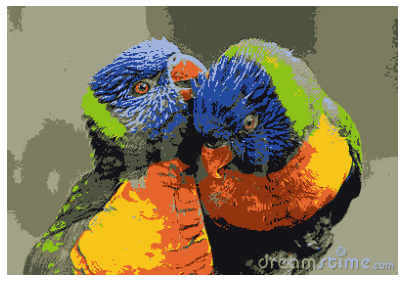

 n_clusters: 20, SSIM: 0.7531052057465701


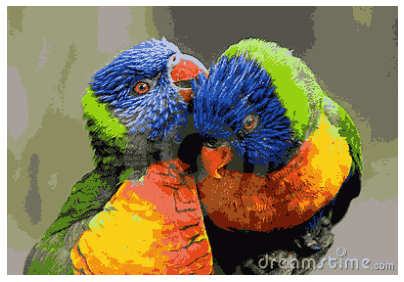

In [ ]:
for k in [2, 3, 10, 20]:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(data)
    new_img = convert_to_image(y_pred, data.copy())
    print(f' n_clusters: {k}, SSIM: {ssim(new_img, img, multichannel=True)}')
    draw_picture(new_img)

Лучший результат у KMeans - 0.753, и кол-во кластеров - 20.

### DBSCAN

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
data.shape

(110000, 3)

In [12]:
data

array([[116, 150, 140],
       [115, 149, 139],
       [113, 147, 137],
       ...,
       [160, 145, 159],
       [159, 144, 158],
       [159, 144, 158]], dtype=uint8)

 min_samples: 2, eps: 0.2, len=10527, SSIM: 0.39793786564370964


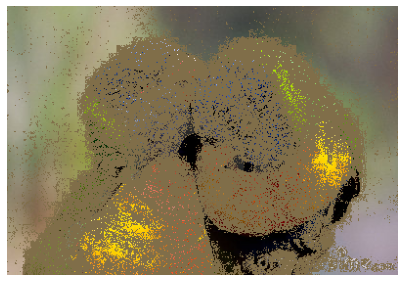

 min_samples: 2, eps: 0.4, len=10527, SSIM: 0.39793786564370964


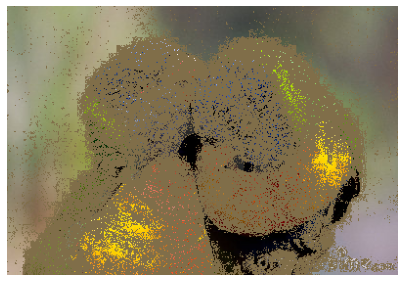

 min_samples: 2, eps: 0.6000000000000001, len=10527, SSIM: 0.39793786564370964


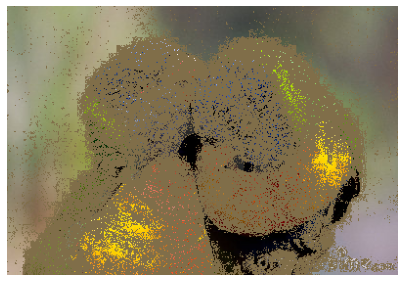

 min_samples: 2, eps: 0.8, len=10527, SSIM: 0.39793786564370964


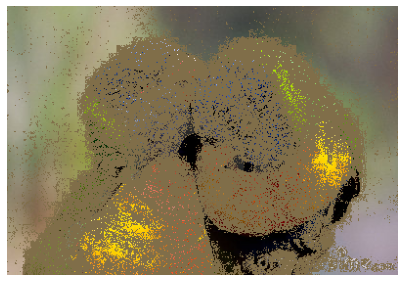

 min_samples: 2, eps: 1.0, len=10715, SSIM: 0.45580606036535315


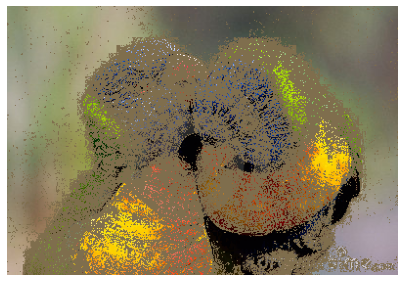

 min_samples: 2, eps: 1.2, len=10715, SSIM: 0.45580606036535315


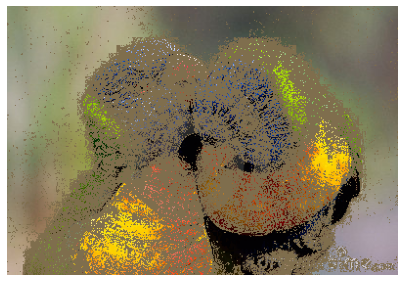

 min_samples: 2, eps: 1.4000000000000001, len=10715, SSIM: 0.45580606036535315


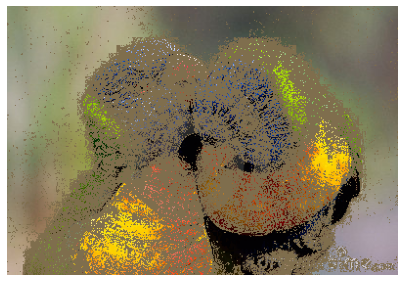

 min_samples: 2, eps: 1.6, len=9125, SSIM: 0.5141906066561254


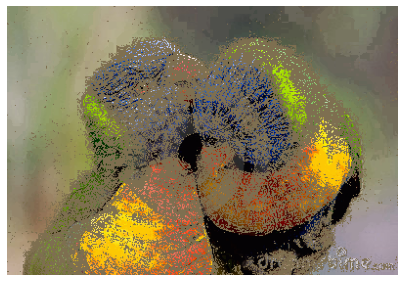

 min_samples: 2, eps: 1.8, len=7547, SSIM: 0.5520263709114261


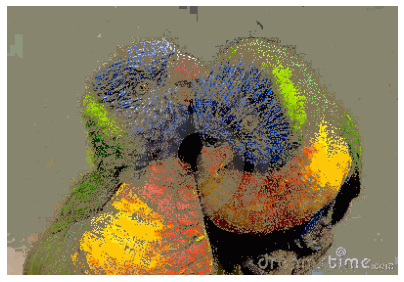

 min_samples: 2, eps: 2.0, len=7537, SSIM: 0.5709536817918165


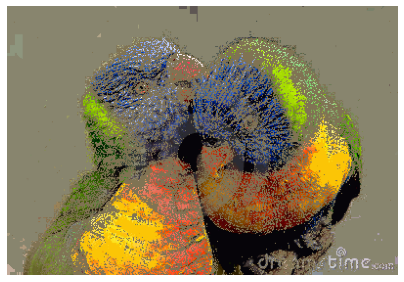

 min_samples: 2, eps: 2.2, len=7537, SSIM: 0.5709536817918165


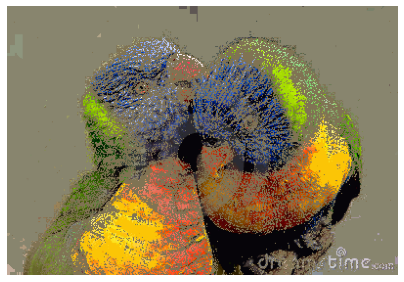

 min_samples: 2, eps: 2.4000000000000004, len=6963, SSIM: 0.5913939855020072


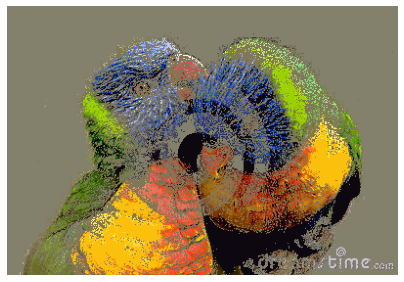

 min_samples: 2, eps: 2.6000000000000005, len=6754, SSIM: 0.5535323183473929


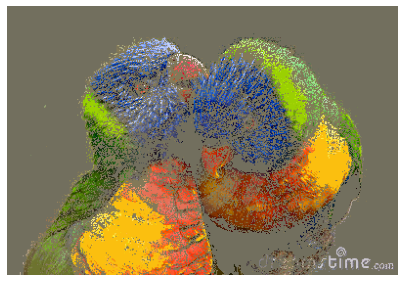

 min_samples: 2, eps: 2.8000000000000003, len=6754, SSIM: 0.5535323183473929


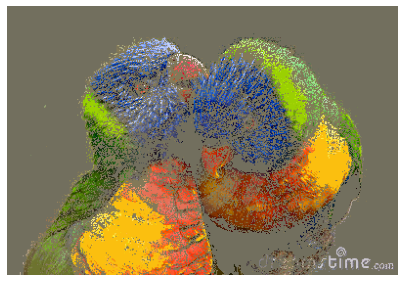

 min_samples: 3, eps: 0.2, len=5732, SSIM: 0.3216068128160348


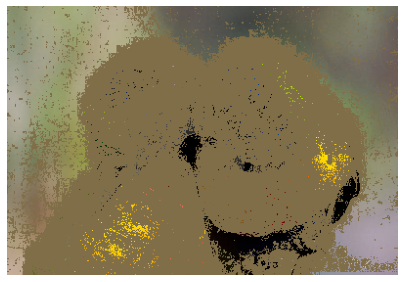

 min_samples: 3, eps: 0.4, len=5732, SSIM: 0.3216068128160348


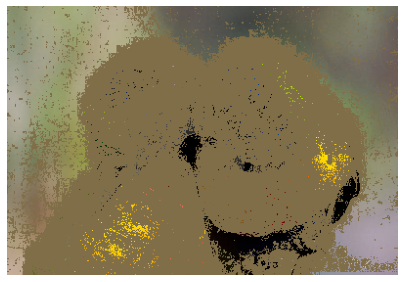

 min_samples: 3, eps: 0.6000000000000001, len=5732, SSIM: 0.3216068128160348


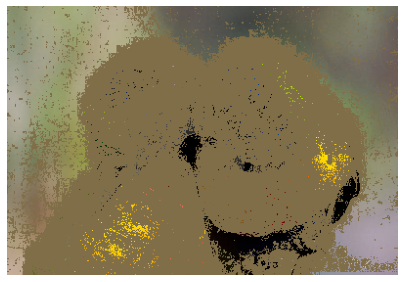

 min_samples: 3, eps: 0.8, len=5732, SSIM: 0.3216068128160348


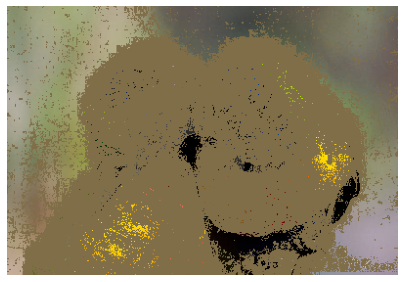

 min_samples: 3, eps: 1.0, len=5671, SSIM: 0.37237635806935315


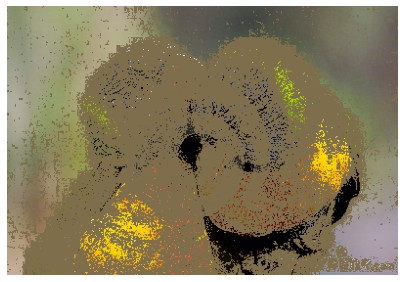

 min_samples: 3, eps: 1.2, len=5671, SSIM: 0.37237635806935315


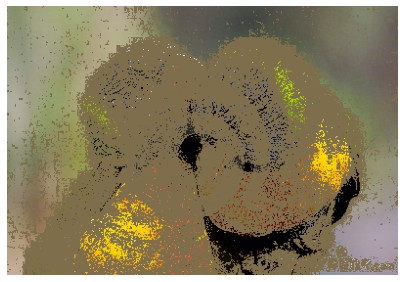

 min_samples: 3, eps: 1.4000000000000001, len=5671, SSIM: 0.37237635806935315


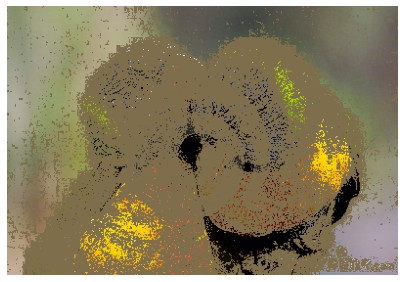

 min_samples: 3, eps: 1.6, len=4159, SSIM: 0.4371640324446777


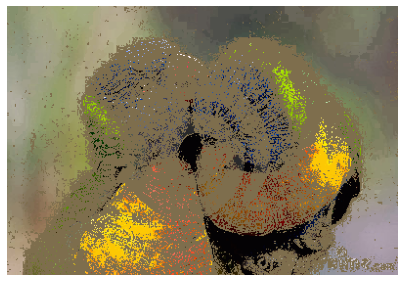

 min_samples: 3, eps: 1.8, len=2892, SSIM: 0.4969819914888703


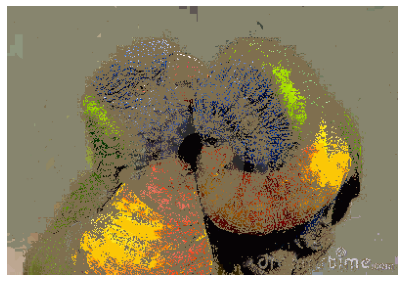

 min_samples: 3, eps: 2.0, len=2921, SSIM: 0.5165738014218979


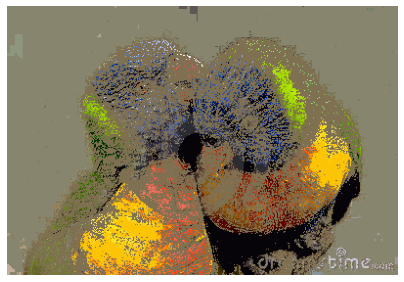

 min_samples: 3, eps: 2.2, len=2921, SSIM: 0.5165738014218979


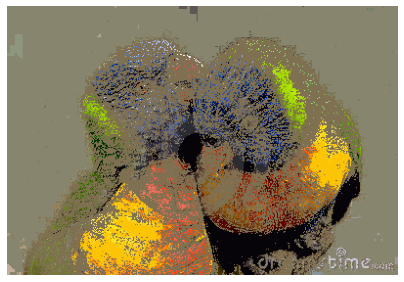

 min_samples: 3, eps: 2.4000000000000004, len=2906, SSIM: 0.5422896055550903


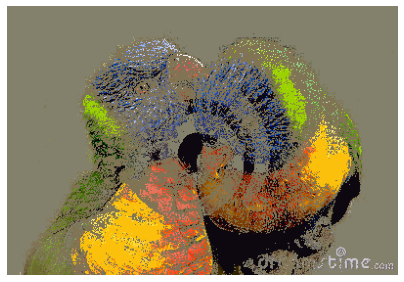

 min_samples: 3, eps: 2.6000000000000005, len=2949, SSIM: 0.506275557122839


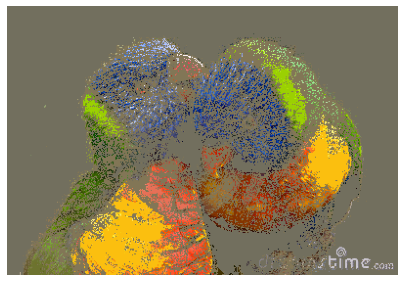

 min_samples: 3, eps: 2.8000000000000003, len=2949, SSIM: 0.506275557122839


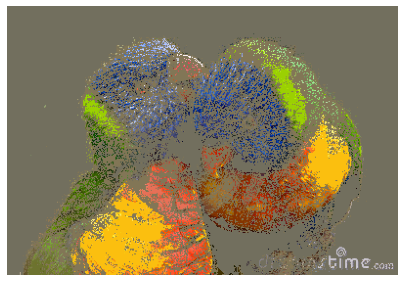

 min_samples: 4, eps: 0.2, len=4130, SSIM: 0.2908494922362004


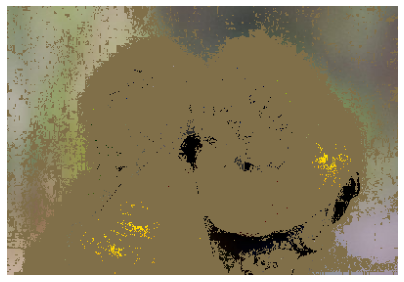

 min_samples: 4, eps: 0.4, len=4130, SSIM: 0.2908494922362004


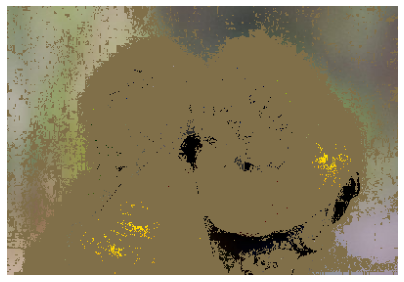

 min_samples: 4, eps: 0.6000000000000001, len=4130, SSIM: 0.2908494922362004


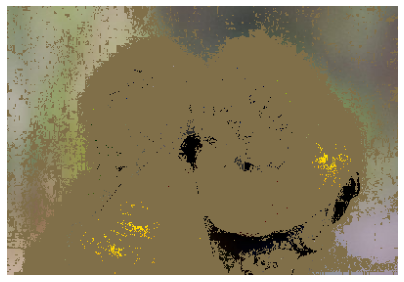

 min_samples: 4, eps: 0.8, len=4130, SSIM: 0.2908494922362004


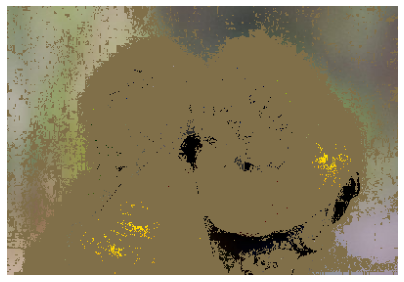

 min_samples: 4, eps: 1.0, len=4074, SSIM: 0.3299535793829283


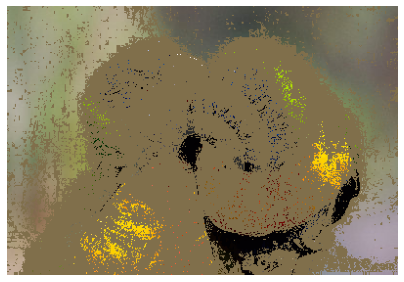

 min_samples: 4, eps: 1.2, len=4074, SSIM: 0.3299535793829283


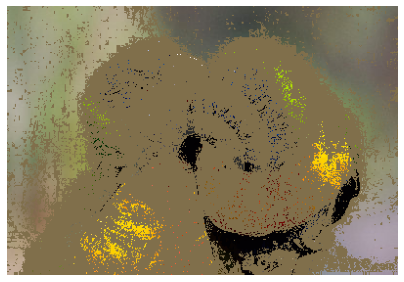

 min_samples: 4, eps: 1.4000000000000001, len=4074, SSIM: 0.3299535793829283


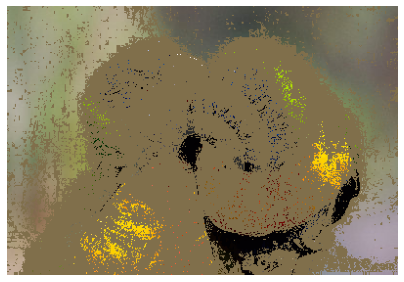

 min_samples: 4, eps: 1.6, len=2690, SSIM: 0.39520944688087684


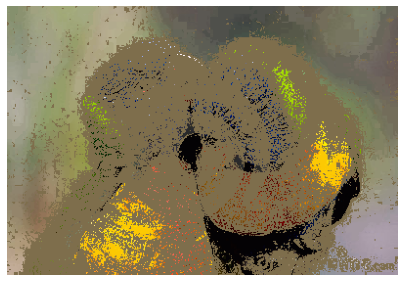

 min_samples: 4, eps: 1.8, len=1371, SSIM: 0.4637149048668984


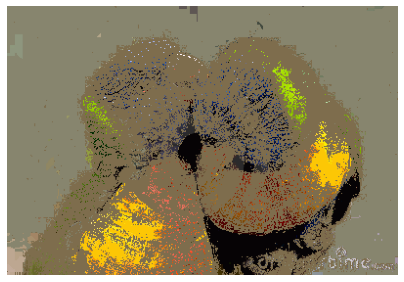

 min_samples: 4, eps: 2.0, len=1422, SSIM: 0.4817230626068148


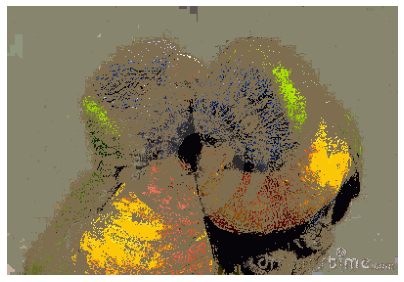

 min_samples: 4, eps: 2.2, len=1422, SSIM: 0.4817230626068148


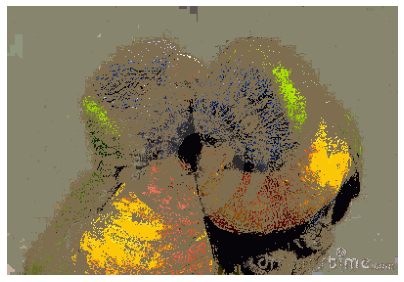

 min_samples: 4, eps: 2.4000000000000004, len=1536, SSIM: 0.511331102322731


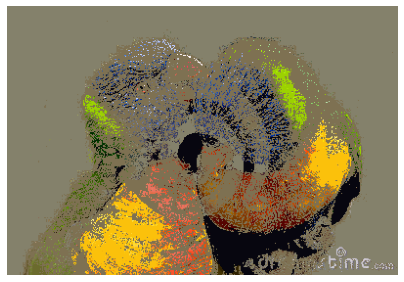

 min_samples: 4, eps: 2.6000000000000005, len=1628, SSIM: 0.4774767175436061


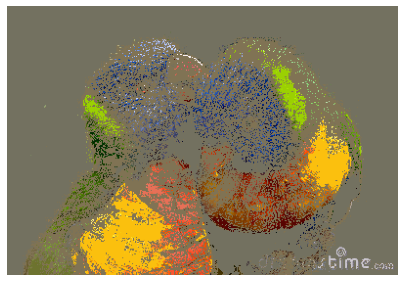

 min_samples: 4, eps: 2.8000000000000003, len=1628, SSIM: 0.4774767175436061


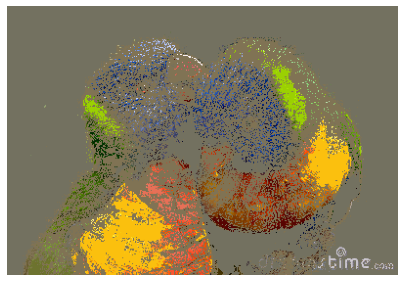

In [94]:
np.random.seed(42)
error_dbs = []
for i in range(2, 5):
    for j in np.arange(0.2, 3, 0.2):
        model = DBSCAN(eps=j, min_samples=i)
        y_pred = model.fit_predict(data)
        new_img = convert_to_image(y_pred, data.copy())
        error_dbs.append((ssim(new_img, img, multichannel=True), (i, j)))
        print(f' min_samples: {i}, eps: {j}, len={len(set(model.labels_))}, SSIM: {ssim(new_img, img, multichannel=True)}')
        draw_picture(new_img)

In [101]:
# Лучшие параметры:
print(sorted(error_dbs, key = lambda x: x[0])[-1])

(0.5913939855020072, (2, 2.4000000000000004))


SSIM:  0.5913939855020072


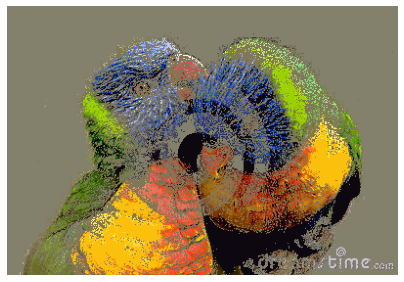

In [102]:
model = DBSCAN(eps=2.4, min_samples=2)
y_pred = model.fit_predict(data)
new_img = convert_to_image(y_pred, data.copy())
print('SSIM: ',ssim(new_img, img, multichannel=True))
draw_picture(new_img)

Этот алгоритм показывает качество хуже. Удалось добиться скора - 0.59, но качество очень посредственное по сравнению с KMeans.

### AgglomerativeClustering

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
import PIL
img = PIL.Image.open('birds.jpg')
img1 = img.resize((80, 55), PIL.Image.ANTIALIAS)
img1.save('resized_image.jpg')

Так как в исходном размере изображение не влезает в ОЗУ, то кропнем его. Я уменьшид в 5 раз, чтобы сохранить пропорции исходного изображения.

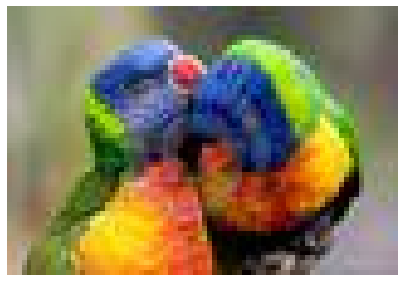

In [21]:
img = cv2.imread('resized_image.jpg')
draw_picture(img)

In [22]:
img.shape

(55, 80, 3)

In [24]:
def convert_to_image_Agg(y_pred, new_image):
    for i in np.unique(y_pred):
        new_image[np.where(y_pred == i)[0], 0] = np.average(data[np.where(y_pred == i)[0], 0])
        new_image[np.where(y_pred == i)[0], 1] = np.average(data[np.where(y_pred == i)[0], 1])
        new_image[np.where(y_pred == i)[0], 2] = np.average(data[np.where(y_pred == i)[0], 2])
    return new_image.reshape(55, 80, 3)

In [25]:
data = img.reshape(55*80, 3)

 n_clusters: 2, SSIM: 0.4752022594008129


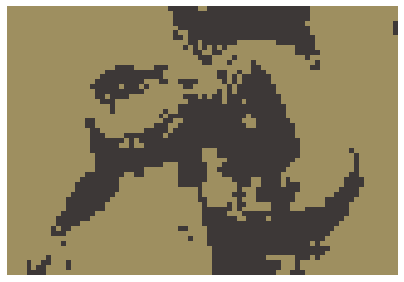

 n_clusters: 3, SSIM: 0.4974499317216548


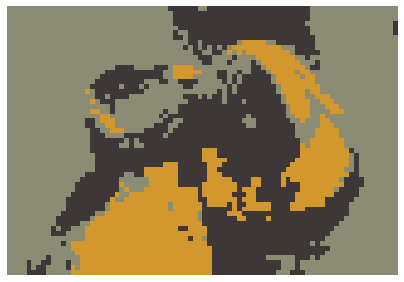

 n_clusters: 10, SSIM: 0.6735326996785248


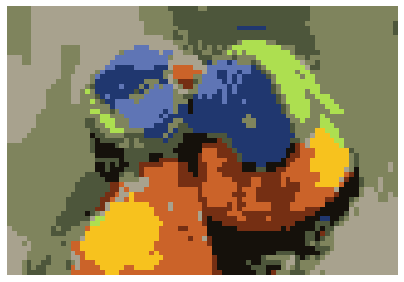

 n_clusters: 20, SSIM: 0.774375510408969


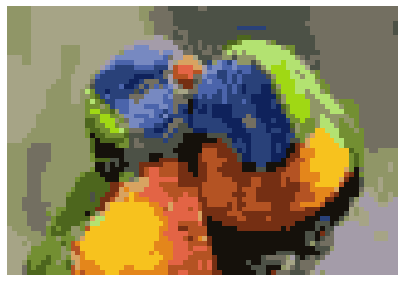

In [26]:
for k in [2, 3, 10, 20]:
    model = AgglomerativeClustering(n_clusters=k)
    y_pred = model.fit_predict(data)
    new_img = convert_to_image_Agg(y_pred, data.copy())
    print(f' n_clusters: {k}, SSIM: {ssim(new_img, img, multichannel=True)}')
    draw_picture(new_img)

Если не считать того, что изоражение уменьшено в 5 раз, то результат прямо даже не плох. На скор ориентироваться смысла нет, так как опять же изображение не исходное. Но работает неплохо.

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [27]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [28]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [30]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [31]:
y.shape

(2370,)

In [32]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

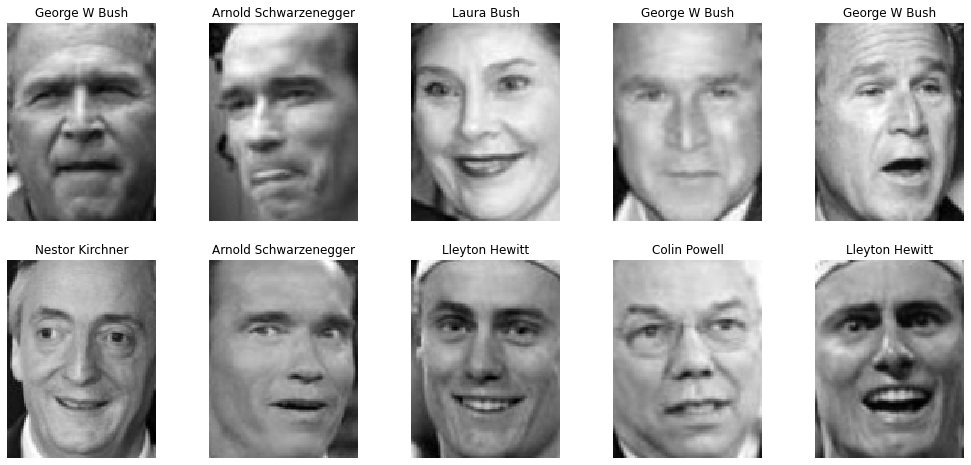

In [33]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

In [41]:
# без уменьшения размерности
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [42]:
model = MultinomialNB()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')

accuracy: 0.3333333333333333


In [43]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')

accuracy: 0.4957805907172996


In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')

accuracy: 0.6729957805907173


Попробовали парочку алгоритмов классификации - лучший скор у регрессии, её дальше и будем использовать.

In [37]:
X_train.shape, y_train.shape

((1896, 11750), (1896,))

In [50]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

### PCA

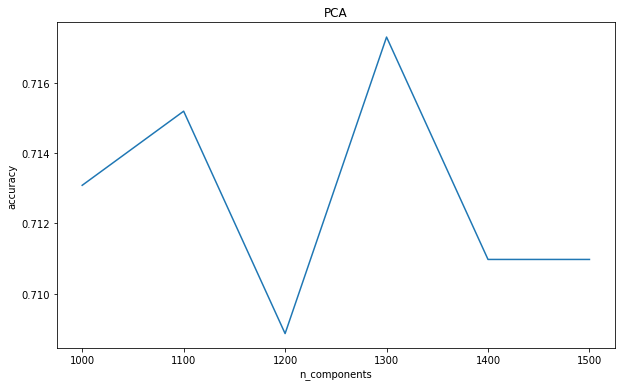

the best accuracy and n_components: (0.7172995780590717, 1300)


In [ ]:
ac = []
for i in np.arange(1000, 1501, 100):
    pca = PCA(n_components=i)

    X_pca_train = pca.fit(X_train).transform(X_train)
    X_pca_test = pca.transform(X_test)

    model = LogisticRegression()
    model.fit(X_pca_train, y_train)
    preds = model.predict(X_pca_test)
    ac.append((accuracy_score(y_test, preds), i))
    #print(f'accuracy: {accuracy_score(y_test, preds)}, n_components {i}')

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1000, 1501, 100), list(map(lambda x: x[0], ac)))
plt.title('PCA')
plt.ylabel('accuracy')
plt.xlabel('n_components')
plt.show()
print(f'the best accuracy and n_components: {sorted(ac, key = lambda x: x[0])[-1]}')

### SVD

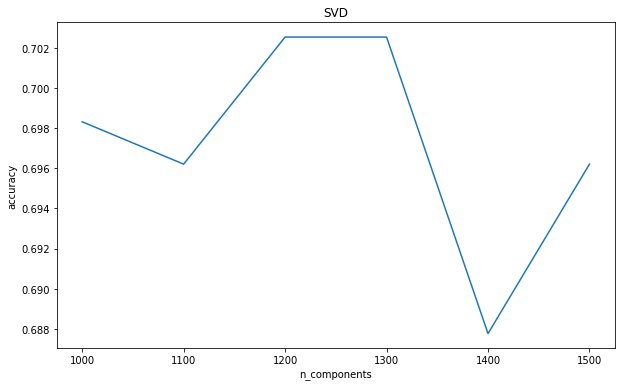

the best accuracy and n_components: (0.7025316455696202, 1300)


In [ ]:
ac = []
for i in np.arange(1000, 1501, 100):
    svd = TruncatedSVD(n_components=i)
    # Применим SVD к нашим векторам с лицами
    X_svd_train = svd.fit_transform(X_train)
    X_svd_test = svd.transform(X_test)

    model = LogisticRegression()
    model.fit(X_svd_train, y_train)
    preds = model.predict(X_svd_test)

    ac.append((accuracy_score(y_test, preds), i))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1000, 1501, 100), list(map(lambda x: x[0], ac)))
plt.title('SVD')
plt.ylabel('accuracy')
plt.xlabel('n_components')
plt.show()
print(f'the best accuracy and n_components: {sorted(ac, key = lambda x: x[0])[-1]}')

### TSNE

In [44]:
print('accuracy with TSNE')

for i in range(2, 4):
    tsne = TSNE(n_components=i, n_iter=400)

    X_tsne_train = tsne.fit_transform(X_train)
    X_tsne_test = tsne.fit_transform(X_test)

    model = LogisticRegression()
    model.fit(X_tsne_train, y_train)
    preds = model.predict(X_tsne_test)

    print(f'With {i} components recieve accuracy: {accuracy_score(y_test, preds)}')

accuracy with TSNE
With 2 components recieve accuracy: 0.22573839662447256
With 3 components recieve accuracy: 0.08860759493670886


In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters = {"penalty":["l1","l2"], 'C' : np.logspace(-4, 4, 20)}

In [47]:
model = LogisticRegression()
grid_search_LR = GridSearchCV(model, parameters, scoring = 'accuracy', verbose = 10, n_jobs = -1)

In [51]:
pca = PCA(n_components=1300)
X_pca_train = pca.fit(X_train).transform(X_train)
X_pca_test = pca.transform(X_test)

In [52]:
grid_search_LR.fit(X_pca_train, y_train)
preds = grid_search_LR.predict(X_pca_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
accuracy: 0.7130801687763713


In [54]:
grid_search_LR.best_params_

{'C': 0.0018329807108324356, 'penalty': 'l2'}

Не то чтобы какая-то доп. инфа появилась...

In [55]:
pca = PCA(n_components=1300)

X_pca_train = pca.fit(X_train).transform(X_train)
X_pca_test = pca.transform(X_test)

model = LogisticRegression(penalty='l2', C=0.002)
model.fit(X_pca_train, y_train)
preds = model.predict(X_pca_test)
accuracy_score(y_test, preds)

0.7130801687763713

In [71]:
errors = np.where(preds != y_test)[0][:10]
not_classifier = []
for i in range(len(y_test[:35])):
    if y_test[i] != preds[i]:
        not_classifier.append(i)

In [104]:
def plot_image(image_id, line, preds, errors, names):
    plt.title('Real name: ' + names[y[image_id]])
    plt.xlabel('Pred name: ' + names[preds[errors[line.index(image_id)]]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols, preds, errors, names):
    fig = plt.gcf()
    fig.set_size_inches(15, 15)#17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id, image_ids, preds, errors, names)

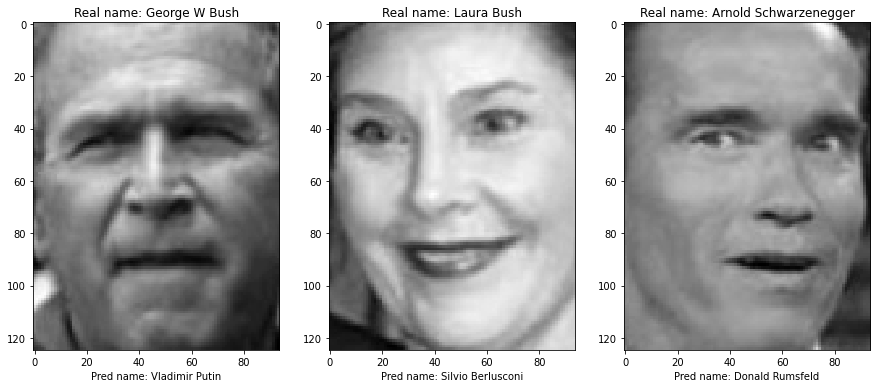

In [105]:
plot_grid(not_classifier[:3], nrows=1, ncols=3, preds=preds, errors=errors, names=names)

### Vizualization PCA

In [77]:
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

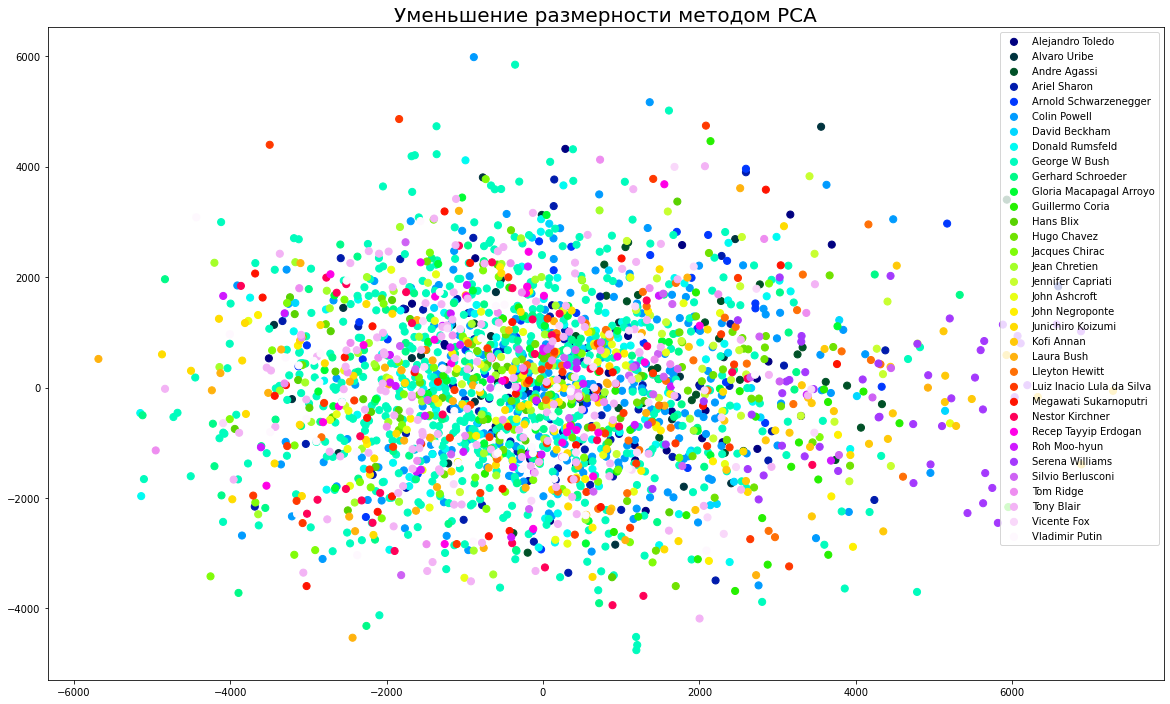

In [79]:
from matplotlib.colors import Normalize

plt.figure(figsize=(20, 12))
for d in range(34): 
    norm = Normalize(vmin=0, vmax=33) 
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_pca[:, 0][y == d],
                X_pca[:, 1][y == d],
                c=[color] * len(X_pca[:, 0][y == d]), label=names[d], edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом PCA", fontsize=20)
plt.legend()
plt.show()